The ratio of training and test is  85.0 : 15.0
Train set: 3099
Test set: 547
Data set: 3646
Accuracy list:

92.13893967093236 

91.77330895795247 

92.68738574040219 

92.87020109689213 

93.41864716636198 

92.87020109689213 

93.60146252285192 

94.3327239488117 

93.78427787934186 

94.14990859232175 

94.14990859232175 



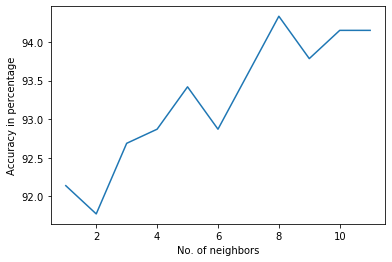

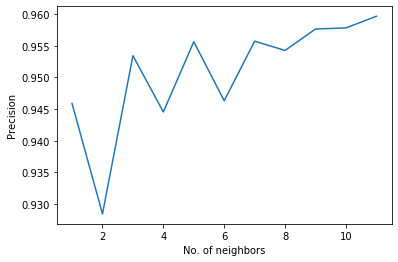

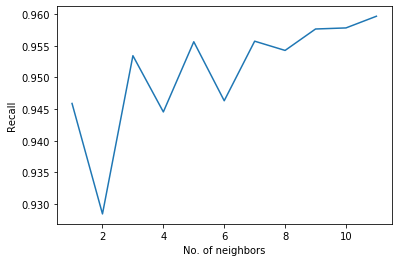

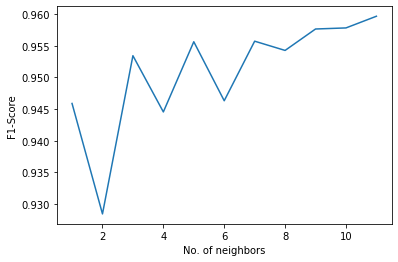

--------------------------------------------------------------------------------------------------------------

The ratio of training and test is  80.0 : 20.0
Train set: 2916
Test set: 730
Data set: 3646


In [ ]:

# coding: utf-8

# In[182]:





# In[ ]:


import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.preprocessing import StandardScaler
from math import sqrt
import operator
from random import seed
from matplotlib import pyplot as plt

#def recall(actual,prediction):
 #   count=0
    #for i in range(len(actual)):
     

def ED(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]),2)
    return sqrt(distance)
def get_neighbors( test_row,train, num_neighbors):
    distances = list()
    for x in range(len(train)):
        dist = ED(test_row, train[x],(len(test_row)-1))
        distances.append((train[x], dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    
    return neighbors
def getResponse(neighbors):
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
def accuracy_metric(actual,prediction):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == prediction[i]:
            correct += 1
    return (correct / float(len(prediction))) * 100.0
 
def precision_metric(actual,prediction):
    co1=0
    C1=0
    C0=0
    co0=0
    maxi=max(prediction)
    mini=min(prediction)
    for x in range(len(prediction)):
        if(actual[x]==maxi):
             C1+=1
             if(actual[x]==prediction[x]):
                    co1+=1
        elif(actual[x]==mini):
             C0+=1
             if(actual[x]==prediction[x]):
                    co0+=1
    TN=co0
    FP=C0-co0
    TP=co1
    FN=C1-co1
    p=(TP)/(TP+FP)
    return p
def recall_metric(actual,prediction):
    co1=0
    C1=0
    C0=0
    co0=0
    maxi=max(prediction)
    mini=min(prediction)
    for x in range(len(prediction)):
        if(actual[x]==maxi):
             C1+=1
             if(actual[x]==prediction[x]):
                    co1+=1
        elif(actual[x]==mini):
             C0+=1
             if(actual[x]==prediction[x]):
                    co0+=1
    TN=co0
    FP=C0-co0
    TP=co1
    FN=C1-co1
    p=(TP)/(TP+FP)
    return p
def various(data,x):
    print("The ratio of training and test is ",(1-x)*100,":",x*100)
    train_set, test_set = train_test_split(data,test_size=x, random_state=100)
    sc = StandardScaler()
    trainingSet = sc.fit_transform(train_set)
    testSet = sc.transform(test_set)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    print ('Data set: '+ repr(len(data)))
    graph=[]
    prec=[]
    recall=[]
    F1=[]
    kvalues=range(1,12,1)
    actual=[x[-1] for x in testSet]
    for k in range(1,12,1):
        prediction=[]
    
        for x in range(len(testSet)):     
            neighbors = get_neighbors(testSet[x], trainingSet, k)
            result=getResponse(neighbors)
            prediction.append(result)
        #s=prediction.sort()
        a=accuracy_metric(actual,prediction)
        p=precision_metric(actual,prediction)
        r=recall_metric(actual,prediction)
        graph.append(a) 
        prec.append(p)
        recall.append(r)
    F1=[((2*prec[i]*recall[i])/(prec[i]+recall[i])) for i in range(len(prec))]
    print("Accuracy list:\n");
    for i in range(len(graph)):
    		print(graph[i],"\n");
    plt.plot(kvalues,graph)
    plt.xlabel('No. of neighbors')
    plt.ylabel('Accuracy in percentage')
    plt.show()  
    plt.plot(kvalues,prec)
    plt.xlabel('No. of neighbors')
    plt.ylabel('Precision')
    plt.show() 
    plt.plot(kvalues,recall)
    plt.xlabel('No. of neighbors')
    plt.ylabel('Recall')
    plt.show()
    plt.plot(kvalues,F1)
    plt.xlabel('No. of neighbors')
    plt.ylabel('F1-Score')
    plt.show() 
    print("--------------------------------------------------------------------------------------------------------------\n")
seed(1)
df=pd.read_csv("cat2.csv")
cls_column=df['class']
pred_column=df['pred']
diff_columns=df['fuv-nuv']
df1=pd.DataFrame(columns=['fuv-nuv','Pred','Class'])
df1['Class']=cls_column
df1['Pred']=pred_column
df1['fuv-nuv']=diff_columns
data=df1.values.tolist()
Testsizes=[0.15,0.2,0.3,0.35,0.4,0.5,0.6]
for ts in Testsizes:
    various(data,ts)
